<h2>DATA 620 - Project 3</h2>
<h3>Name Gender Classifier</h3>

<h3>Joby John</h3>

<h3>Assignment</h3>

Using any of the three classifiers described in chapter 6 of Natural Language Processing with Python, and any features you can think of, build the best name gender classifier you can.

We will split dataset into three subsets. 80% data for training, 10 % data for dev-test and 10 %  for testing. We are mainting to the seperate test and dev-test. 

We will compare the performance of different classifiers on these datasets.


<h3>Libraries</h3>

In [1]:
import nltk
import pandas as pd
import random
from nltk.corpus import names
from nltk.classify import apply_features
import collections
import nltk.metrics
from nltk.metrics import precision,recall,f_measure
import numpy as np
import matplotlib.pyplot as plt

<h3>Data</h3>

We will import the male and female ness from NLTk librarby and shuffle the names so the sampling is random acorss all the names.  'male.txt' contains 2943 names and 'female.txt' contains 5001 names. 

In [2]:
random.seed(100)

print(len(names.words('male.txt')))
print(len(names.words('female.txt')))
      
names = ([(name, 'male') for name in names.words('male.txt')] +
[(name, 'female') for name in names.words('female.txt')])

# and to make sure we are sampling across all the names
# we shuffle them so they aren't alphabetical
random.shuffle(names)

2943
5001


<h4>Sample Data</h4>
Belows we print some of the names in the dataset. 

In [3]:
#list names
 
print(names[:10])

[('Pembroke', 'male'), ('Bryant', 'male'), ('Pier', 'female'), ('Florice', 'female'), ('Clint', 'male'), ('Ruthanne', 'female'), ('Upton', 'male'), ('Yetty', 'female'), ('Silvie', 'female'), ('Lizzie', 'female')]


<h4>Split dataset : Train, Dev-Test and Test </h4>
We will 10%(800 names) data fort Test and Dev-Test. 80%(6344) the data will be used for training. 

In [4]:
print("Total Names : " , len(names))

Total Names :  7944


In [5]:
test_set = names[:800]
print("Test Set Count : " , len(test_set))
devtest_set = names[800:1600] 
print("dev test set : " , len(devtest_set))
train_set = names[1600:]
print("train set: " , len(train_set))

Test Set Count :  800
dev test set :  800
train set:  6344


<h3>Feature Set - Gender</h3>
We will define the features set as the first letter, last letter, last two letters, first two letters, number of vowles and has letter in the vowel. 
We will use Navie Bayes and Decision Trees and compare their performance to see which is good at predicting.

In [6]:
def features(name):
    f = {}
    f["first"] = name[0].lower()
    f["last"] = name[-1].lower()
    f["suffix2"]= name[-2:].lower()
    f["preffix2"]= name[:2].lower()
    for letter in 'aeiou':
        f["count(%s)" % letter] = name.lower().count(letter)
        f["has(%s)" % letter] = (letter in name.lower())
    return f

In [7]:
featuresets = [(features(n), g) for (n,g) in names]

In [8]:
train_f = featuresets[1000:]
test_f = featuresets[:500]
devtest_f =featuresets[500:1000]

<h3>Naive Bayes </h3>
We will use Naive Bayes classifier and calculate Accuracy, Recall, Precision and F_Measure

In [9]:
nbclassifier = nltk.NaiveBayesClassifier.train(train_f)

<h4>Calculate Metrics: Accuracy, Recall, Precision, F_Measure </h4>

In [10]:
def getMetrics(cls, dataset ):
    refsets = collections.defaultdict(set)
    testsets = collections.defaultdict(set)

    for i, (f, label) in enumerate(dataset):
        refsets[label].add(i)
        observed = cls.classify(f)
        testsets[observed].add(i)

    a = nltk.classify.accuracy(cls, dataset)
    p = (precision(refsets['male'], testsets['male'])+precision(refsets['male'], testsets['female']))/2
    r = (recall(refsets['male'], testsets['male'])+recall(refsets['male'], testsets['female']))/2
    f = (f_measure(refsets['male'], testsets['male'])+f_measure(refsets['male'], testsets['female']))/2

    return (a, p,r,f)


In [11]:


accuracy_train, avg_precision_train, avg_recall_train, avg_f_measure_train = getMetrics(nbclassifier, train_f)
 
accuracy_test ,  avg_precision_test ,avg_recall_test , avg_f_measure_test = getMetrics(nbclassifier, test_f)

accuracy_dev ,  avg_precision_dev ,avg_recall_dev , avg_f_measure_dev = getMetrics(nbclassifier, devtest_f)

 
accuracy_naive_final = [accuracy_train,accuracy_test,accuracy_dev]
precision_naive_final = [avg_precision_train,avg_precision_test,avg_precision_dev]
recall_naive_final = [avg_recall_train,avg_recall_test,avg_recall_dev]
f_measure_naive_final = [avg_f_measure_train,avg_f_measure_test,avg_f_measure_dev]

naive_final_train = [accuracy_train,avg_precision_train,avg_recall_train,avg_f_measure_train]
naive_final_test = [accuracy_test,avg_precision_test,avg_recall_test,avg_f_measure_test]
naive_final_dev = [accuracy_dev,avg_precision_dev,avg_recall_dev,avg_f_measure_dev]
naive_combined = {'Accuracy':accuracy_naive_final,'Precision':precision_naive_final,'Recall':recall_naive_final,'F_Measure':f_measure_naive_final}
print(naive_final_train)
df_naive = pd.DataFrame(naive_combined,index=['Train','Test','Dev'],columns=['Accuracy','Precision','Recall','F_Measure'])
print(df_naive)

[0.808323732718894, 0.4347615145765051, 0.5, 0.46174407493051245]
       Accuracy  Precision  Recall  F_Measure
Train  0.808324   0.434762     0.5   0.461744
Test   0.772000   0.407191     0.5   0.444694
Dev    0.804000   0.444895     0.5   0.466066


<h4>Naive Baiyer features </h4>

In [12]:

nbclassifier.show_most_informative_features(20)

Most Informative Features
                 suffix2 = 'na'           female : male   =     92.8 : 1.0
                 suffix2 = 'ia'           female : male   =     88.7 : 1.0
                 suffix2 = 'la'           female : male   =     71.0 : 1.0
                    last = 'a'            female : male   =     34.9 : 1.0
                 suffix2 = 'sa'           female : male   =     34.8 : 1.0
                 suffix2 = 'ra'           female : male   =     34.2 : 1.0
                 suffix2 = 'ld'             male : female =     32.6 : 1.0
                    last = 'k'              male : female =     30.1 : 1.0
                 suffix2 = 'us'             male : female =     25.8 : 1.0
                 suffix2 = 'do'             male : female =     24.8 : 1.0
                 suffix2 = 'ta'           female : male   =     24.1 : 1.0
                 suffix2 = 'rd'             male : female =     22.3 : 1.0
                 suffix2 = 'rt'             male : female =     22.0 : 1.0

<h4>Calculate erorr rate</h4>

In [13]:
# Check errors
errors = []
for (name, tag) in devtest_set:
    guess = nbclassifier.classify(features(name))
    if guess != tag:
        errors.append( (tag, guess, name) )

In [14]:
for (tag, guess, name) in sorted(errors):
    print('correct=%-8s guess=%-8s name=%-30s' % (tag, guess, name))

correct=female   guess=male     name=Adelind                       
correct=female   guess=male     name=Aubrey                        
correct=female   guess=male     name=Austin                        
correct=female   guess=male     name=Avrit                         
correct=female   guess=male     name=Barb                          
correct=female   guess=male     name=Beau                          
correct=female   guess=male     name=Bel                           
correct=female   guess=male     name=Berry                         
correct=female   guess=male     name=Bill                          
correct=female   guess=male     name=Birgit                        
correct=female   guess=male     name=Bridgett                      
correct=female   guess=male     name=Charmion                      
correct=female   guess=male     name=Clair                         
correct=female   guess=male     name=Courtney                      
correct=female   guess=male     name=Devin      

<h4>Error Count - NB</h4>

In [15]:
naive_errors = len(errors)
print("Error count: ", naive_errors)

Error count:  155


<h3>Decision Tree</h3>

We will use Decision Tree classifier and calculate Accuracy, Recall, Precision and F_Measure

In [16]:
dtclassifier = nltk.DecisionTreeClassifier.train(train_f)

<h4>Calculate Metrics</h4>

In [17]:
accuracy_train_dt, avg_precision_train_dt, avg_recall_train_dt , avg_f_measure_train_dt = getMetrics(dtclassifier, train_f)
 
accuracy_test_dt, avg_precision_test_dt, avg_recall_test_dt , avg_f_measure_test_dt = getMetrics(dtclassifier, test_f)

accuracy_dev_dt, avg_precision_dev_dt, avg_recall_dev_dt , avg_f_measure_dev_dt = getMetrics(dtclassifier, devtest_f)

 
accuracy_dt_final = [accuracy_train_dt,accuracy_test_dt,accuracy_dev_dt]
precision_dt_final = [avg_precision_train_dt,avg_precision_test_dt,avg_precision_dev_dt]
recall_dt_final = [avg_recall_train_dt,avg_recall_test_dt,avg_recall_dev_dt]
f_measure_dt_final = [avg_f_measure_train_dt,avg_f_measure_test_dt,avg_f_measure_dev_dt]

dt_final_train = [accuracy_train_dt,avg_precision_train_dt,avg_recall_train_dt,avg_f_measure_train_dt]
dt_final_test = [accuracy_test_dt,avg_precision_test_dt,avg_recall_test_dt,avg_f_measure_test_dt]
dt_final_dev = [accuracy_dev_dt,avg_precision_dev_dt,avg_recall_dev_dt,avg_f_measure_dev_dt]
dt_combined = {'Accuracy':accuracy_dt_final,'Precision':precision_dt_final,'Recall':recall_dt_final,'F_Measure':f_measure_dt_final}
df_dt = pd.DataFrame(dt_combined,index=['Train','Test','Dev'],columns=['Accuracy','Precision','Recall','F_Measure'])
print(dt_final_train)
print(df_dt)

[0.9354838709677419, 0.4978088415309307, 0.5, 0.4955517454714082]
       Accuracy  Precision  Recall  F_Measure
Train  0.935484   0.497809     0.5   0.495552
Test   0.772000   0.422845     0.5   0.450518
Dev    0.764000   0.452701     0.5   0.465040


<h4>Calculate error rate </h4>

In [18]:
errors2 = []
for (name, tag) in devtest_set:
    guess = dtclassifier.classify(features(name))
    if guess != tag:
        errors2.append( (tag, guess, name) )

In [19]:
for (tag, guess, name) in sorted(errors): # doctest: +ELLIPSIS +NORMALIZE_WHITESPACE
    print('correct=%-8s guess=%-8s name=%-30s' % (tag, guess, name))

correct=female   guess=male     name=Adelind                       
correct=female   guess=male     name=Aubrey                        
correct=female   guess=male     name=Austin                        
correct=female   guess=male     name=Avrit                         
correct=female   guess=male     name=Barb                          
correct=female   guess=male     name=Beau                          
correct=female   guess=male     name=Bel                           
correct=female   guess=male     name=Berry                         
correct=female   guess=male     name=Bill                          
correct=female   guess=male     name=Birgit                        
correct=female   guess=male     name=Bridgett                      
correct=female   guess=male     name=Charmion                      
correct=female   guess=male     name=Clair                         
correct=female   guess=male     name=Courtney                      
correct=female   guess=male     name=Devin      

<h4>Error Count - DT</h4>

In [20]:
dt_errors = len(errors2)
print("Error count: ", dt_errors)

Error count:  76


<h3>Comparing Naive Bayes vs Decision Tree </h3>

In [21]:
def plotdata (color, color1, label1, label2, setname, nb, dt, error= False):
    if(error ) :
        n_groups = 1
    else :
        n_groups = 4 
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.25
    opacity = 0.75

    rects1 = plt.bar(index, nb, bar_width,
    alpha=opacity,
    color=color,
    label=label1)

    rects2 = plt.bar(index + bar_width, dt, bar_width,
    alpha=opacity,
    color=color1,
    label=label2)

    plt.xlabel('Metrics')
    plt.ylabel('Scores')
    plt.title( setname + ' Set - NaiveBayes Vs DecisionTree')
    if(not error):
        plt.xticks(index + bar_width, ('Accuracy', 'Precision', 'Recall', 'F_Measure'))
 
    plt.legend()

    plt.tight_layout()
    plt.show()

<h3>Conclusion</h3>

<h4>How does the performance on the test set compare to the performance on the dev-test set? Is this what you'd expect?</h4>




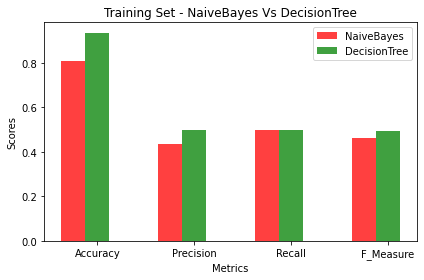

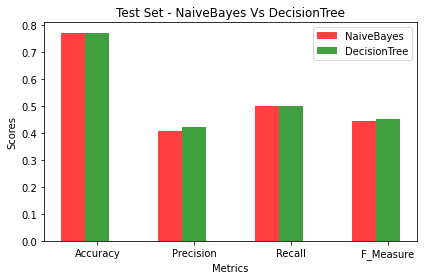

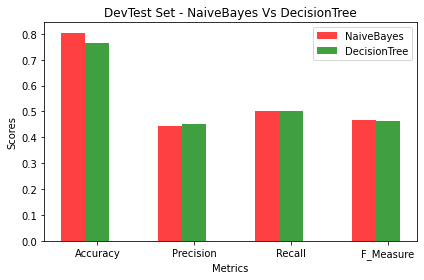

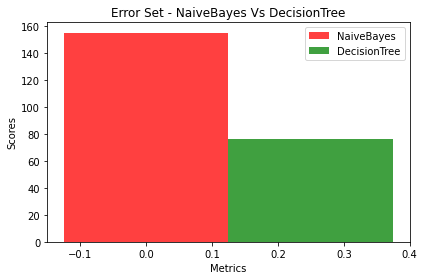

In [22]:

plotdata('r','g','NaiveBayes','DecisionTree', 'Training',naive_final_train,dt_final_train,False)

plotdata('r','g','NaiveBayes','DecisionTree', 'Test',naive_final_test,dt_final_test,False)

plotdata('r','g','NaiveBayes','DecisionTree', 'DevTest',naive_final_dev,dt_final_dev,False)
 
plotdata('r','g','NaiveBayes','DecisionTree', 'Error',naive_errors,dt_errors, True )

Decision Tree model has better accuracy on Training and Test set.  Naive Bayes is slightly better on the  Dev Test set. Error rate  for Decision tree model is a lot better than Naive Bayes. Based on these I think Decision Tree model is a better model. Also, creating multiple features sets and analysing their performance on different models will give us better insight. That was something I wanted to do but due to the time constraints I was not able to do that. 